In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('Social_Network_Ads.csv')

In [4]:
df=df.iloc[:,2:]

In [5]:
df.sample(5)

,Age,EstimatedSalary,Purchased
330,38,51000,0
219,59,143000,1
85,31,118000,1
319,36,60000,0
304,40,60000,0


**Before doing standardization yu must do the train_test_split**

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Purchased', axis=1),df['Purchased'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

# Standard Scaler

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fitting scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# sclaer learns from training and we transform both train and test

# transform train and test set(into standardScaler)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
scaler.mean_ # will give u scaled data

array([3.78642857e+01, 6.98071429e+04])

In [23]:
# now the data which is sclaed is on numpy array
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [24]:
# we need to convert it in data frmae
X_train_scaled= pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled= pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [25]:
X_test_scaled

,Age,EstimatedSalary
0,-0.771013,0.497201
1,0.013305,-0.572804
2,-0.280814,0.150172
3,-0.771013,0.265849
4,-0.280814,-0.572804
...,...,...
115,1.091743,-0.139018
116,0.699584,1.769639
117,-0.672973,0.555039
118,0.797624,0.352606


In [ ]:
np.round(X_train.describe(), 1) #original dataset

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [ ]:
np.round(X_train_scaled.describe(), 1) #Scaled the training dataset

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Effect of Scaling

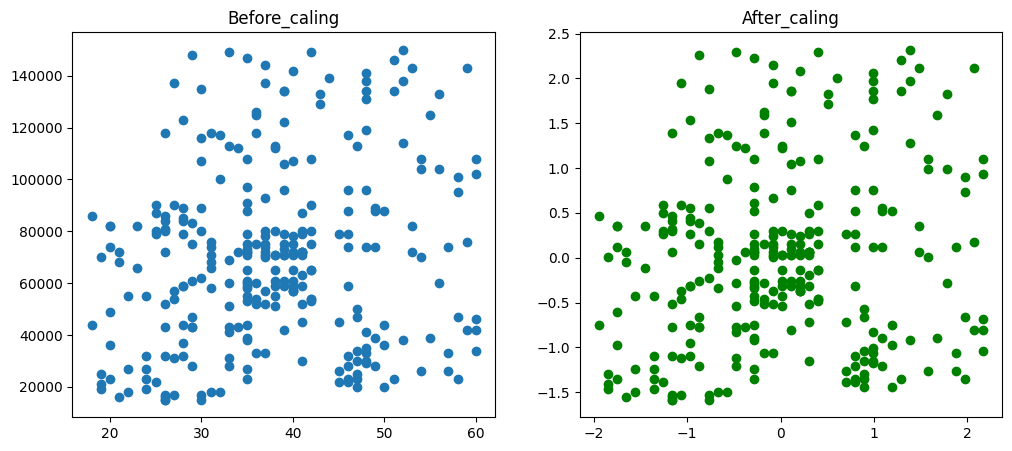

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before_caling')
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'], color='green')
ax2.set_title('After_caling')
plt.show()


In [27]:
type(X_train_scaled)

pandas.core.frame.DataFrame

In [28]:
print(X_train_scaled.columns)

Index(['Age', 'EstimatedSalary'], dtype='object')


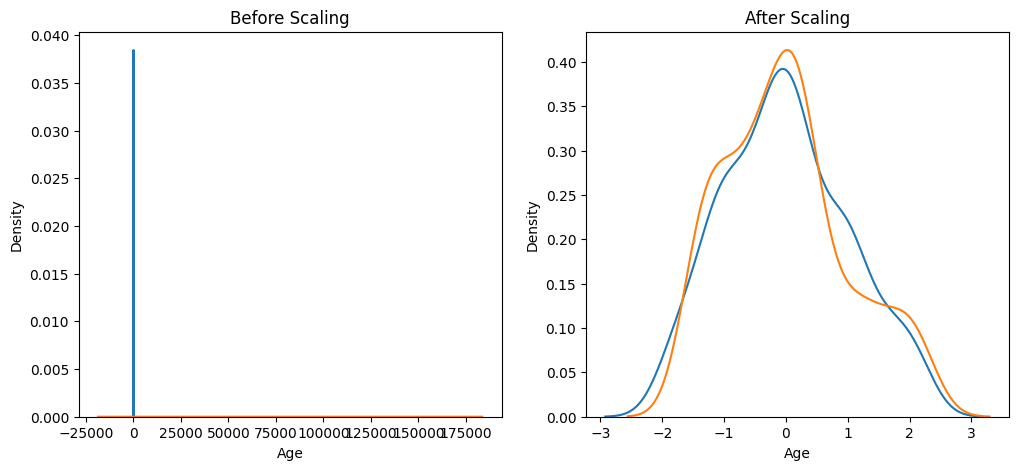

In [29]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# After scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)

plt.show()


# Comparison of Distributions

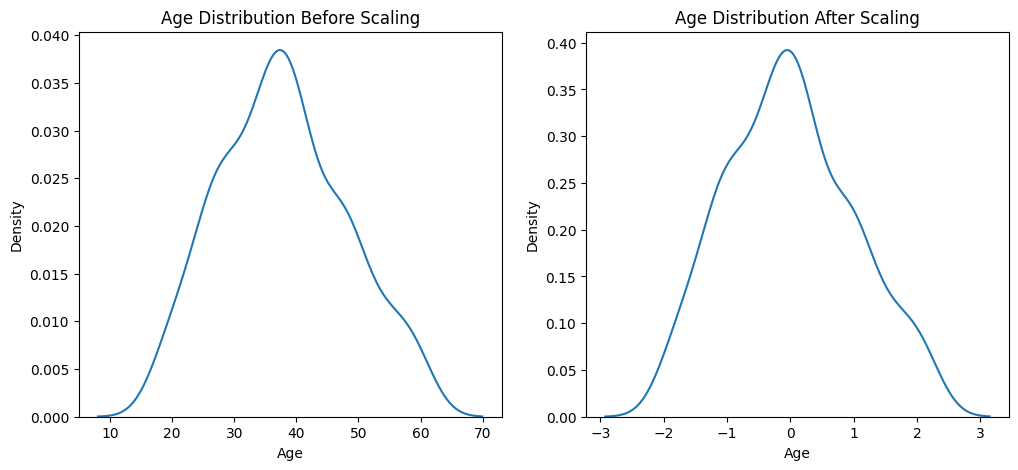

In [31]:
fig, (ax1, ax2)= plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

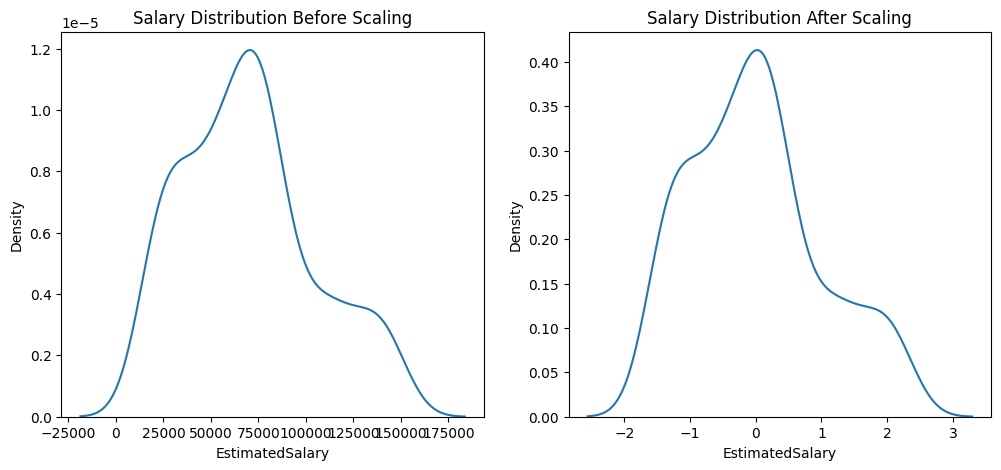

In [33]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution After Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Why Feature Scaling is important

In [45]:
from sklearn.linear_model import LogisticRegression


In [46]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [47]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [48]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
print("Actual", accuracy_score(y_test, y_pred))
print("Scaled", accuracy_score(y_test, y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


# lets train it on decision tree algo

In [53]:
from sklearn.tree import DecisionTreeClassifier


In [54]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [57]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [59]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [60]:
print("Actual", accuracy_score(y_test, y_pred))
print("Scaled", accuracy_score(y_test, y_pred_scaled))

Actual 0.8666666666666667
Scaled 0.875
